In [7]:
import sys, os, decimal, json
sys.path.append(os.path.realpath('..'))
import json, time
import pandas as pd
import matplotlib.pyplot as plt

from TrainingPipelines.ImageClassifier.ModelBuilder import build_and_train

from google.cloud import storage
import os
from pathlib import Path
from dotenv import load_dotenv

env_path = Path(fr"{os.environ['USERPROFILE']}\.env")
load_dotenv(dotenv_path=env_path)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = os.getenv("Eve_Online_GCP_Creds_File")

import seaborn as sns
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [8]:
def save_to_gcp(source_file, dest_file):
    storage_client = storage.Client()
    bucket = storage_client.get_bucket("eve_online_models") # your bucket name
    blob = bucket.blob(dest_file) 
    blob.upload_from_filename(source_file)
    #blob = bucket.blob('eve_online_models/Eve_Online_Models/test.h5') 
    #blob.upload_from_filename(r"O:\eve_models\training_data\game_state\game_state_model.h5")

1739
Found 1739 files belonging to 25 classes.
Using 1392 files for training.
Found 1739 files belonging to 25 classes.
Using 347 files for validation.
['200', '210', '220', '250', '260', '270', '290', '310', '320', '330', '340', '350', '360', '370', '380', '390', '400', '410', '420', '430', '440', '460', '470', '480', '490']
Epoch 1/30
1392/1392 [==============================] - 12s 7ms/step - loss: 1.0349 - accuracy: 0.8096 - val_loss: 0.2616 - val_accuracy: 0.9452
Epoch 2/30
1392/1392 [==============================] - 9s 7ms/step - loss: 0.4607 - accuracy: 0.9030 - val_loss: 0.1317 - val_accuracy: 0.9395
Epoch 3/30
1392/1392 [==============================] - 9s 7ms/step - loss: 0.4116 - accuracy: 0.9080 - val_loss: 0.1708 - val_accuracy: 0.9568
Epoch 4/30
1392/1392 [==============================] - 9s 7ms/step - loss: 0.3319 - accuracy: 0.9159 - val_loss: 0.1493 - val_accuracy: 0.9597
Epoch 5/30
1392/1392 [==============================] - 9s 7ms/step - loss: 0.2911 - accuracy: 

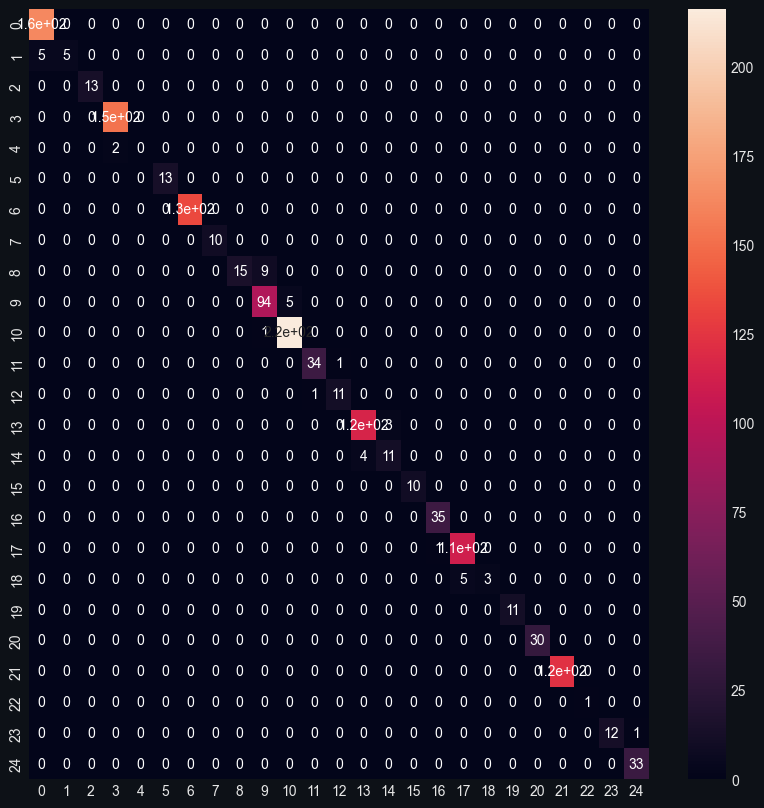

In [9]:
model_name = 'route_y_large_vert_class_v2'
training_root = r'O:\eve_models\training_data\route_y_large_vert_class_v2'

results = build_and_train(root_image_directory=training_root, model_name=model_name, epochs=30, resize_ratio=1)
df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')

In [14]:
save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')

1217
Found 1217 files belonging to 25 classes.
Using 974 files for training.
Found 1217 files belonging to 25 classes.
Using 243 files for validation.
['198', '209', '220', '242', '253', '264', '275', '286', '297', '308', '319', '330', '341', '352', '363', '374', '396', '407', '418', '429', '440', '462', '473', '484', '495']
Epoch 1/30
974/974 [==============================] - 11s 8ms/step - loss: 1.4269 - accuracy: 0.7094 - val_loss: 0.8310 - val_accuracy: 0.7695
Epoch 2/30
974/974 [==============================] - 7s 7ms/step - loss: 0.7807 - accuracy: 0.8018 - val_loss: 0.5962 - val_accuracy: 0.7695
Epoch 3/30
974/974 [==============================] - 7s 7ms/step - loss: 0.6237 - accuracy: 0.8347 - val_loss: 0.5599 - val_accuracy: 0.8066
Epoch 4/30
974/974 [==============================] - 7s 7ms/step - loss: 0.5350 - accuracy: 0.8429 - val_loss: 0.6571 - val_accuracy: 0.8066
Epoch 5/30
974/974 [==============================] - 7s 7ms/step - loss: 0.4447 - accuracy: 0.8501 - va

<Axes: >

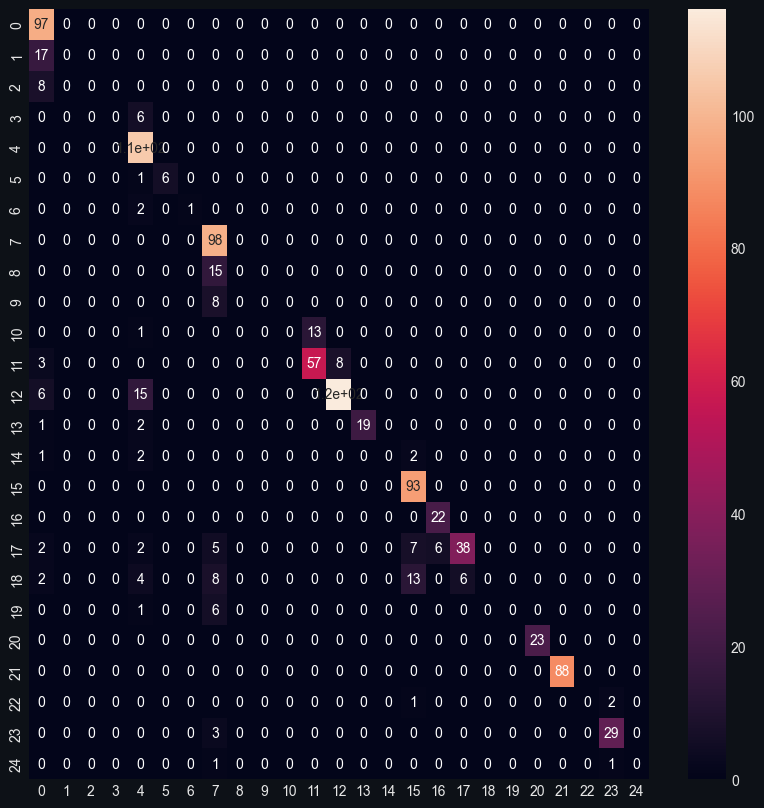

In [2]:
model_name = 'route_y_large_vert_class'
training_root = r'O:\eve_models\training_data\route_y_large_vert_class'

results = build_and_train(root_image_directory=training_root, model_name=model_name, epochs=30, resize_ratio=1)
results

df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

1741
Found 1741 files belonging to 28 classes.
Using 1393 files for training.
Found 1741 files belonging to 28 classes.
Using 348 files for validation.
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '23', '24', '25', '26', '27', '28', '29', '3', '4', '5', '6', '7', '8', '9']
Epoch 1/30
1393/1393 [==============================] - 7s 4ms/step - loss: 3.1735 - accuracy: 0.1149 - val_loss: 2.9494 - val_accuracy: 0.1983
Epoch 2/30
1393/1393 [==============================] - 5s 3ms/step - loss: 2.4565 - accuracy: 0.2764 - val_loss: 1.8696 - val_accuracy: 0.4253
Epoch 3/30
1393/1393 [==============================] - 5s 3ms/step - loss: 1.6233 - accuracy: 0.5162 - val_loss: 1.1786 - val_accuracy: 0.6954
Epoch 4/30
1393/1393 [==============================] - 5s 3ms/step - loss: 1.0300 - accuracy: 0.6935 - val_loss: 0.8307 - val_accuracy: 0.7557
Epoch 5/30
1393/1393 [==============================] - 5s 4ms/step - loss: 0.7064 - accuracy: 0.7753 - val_loss

<Axes: >

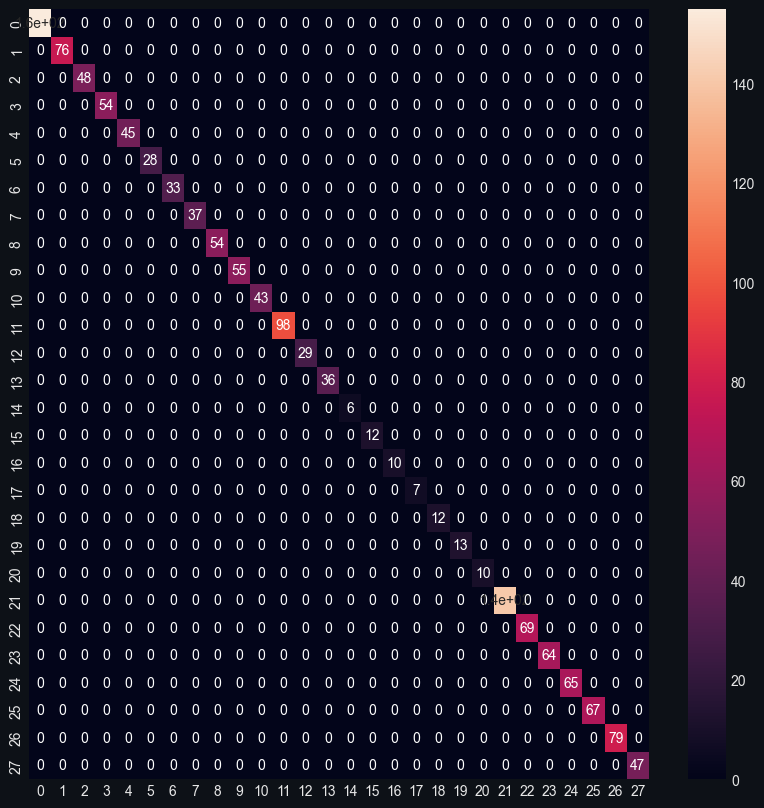

In [2]:
model_name = 'large_box_counter'
training_root = r'O:\eve_models\training_data\large_box_counter'

results = build_and_train(root_image_directory=training_root, model_name=model_name, epochs=30, resize_ratio=0.5)
results

df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

In [1]:
model_name = 'box_counter'
training_root = r'O:\eve_models\training_data\box_counter'

results = build_and_train(root_image_directory=training_root, model_name=model_name)
results

df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

NameError: name 'build_and_train' is not defined

In [3]:
results

{'image_resize': [20, 8],
 'class_location': 'O:\\eve_models\\training_data\\box_counter\\box_counter_classes.json',
 'model_location': 'O:\\eve_models\\training_data\\box_counter\\box_counter_model.h5',
 'class_names': ['1', '2'],
 'cm': array([[ 70,   0],
        [  0, 115]], dtype=int64)}

55
Found 55 files belonging to 3 classes.
Using 44 files for training.
Found 55 files belonging to 3 classes.
Using 11 files for validation.
['second_pos', 'seventh_pos', 'third_pos']
Epoch 1/10
44/44 [==============================] - 1s 6ms/step - loss: 1.0629 - accuracy: 0.5682 - val_loss: 0.6882 - val_accuracy: 0.9091
Epoch 2/10
44/44 [==============================] - 0s 4ms/step - loss: 0.6630 - accuracy: 0.7500 - val_loss: 0.3174 - val_accuracy: 1.0000
Epoch 3/10
44/44 [==============================] - 0s 4ms/step - loss: 0.3581 - accuracy: 0.8864 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.1969 - accuracy: 0.9318 - val_loss: 0.0532 - val_accuracy: 1.0000
Epoch 5/10
44/44 [==============================] - 0s 4ms/step - loss: 0.1568 - accuracy: 0.9545 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9773 - val_loss: 0.0011

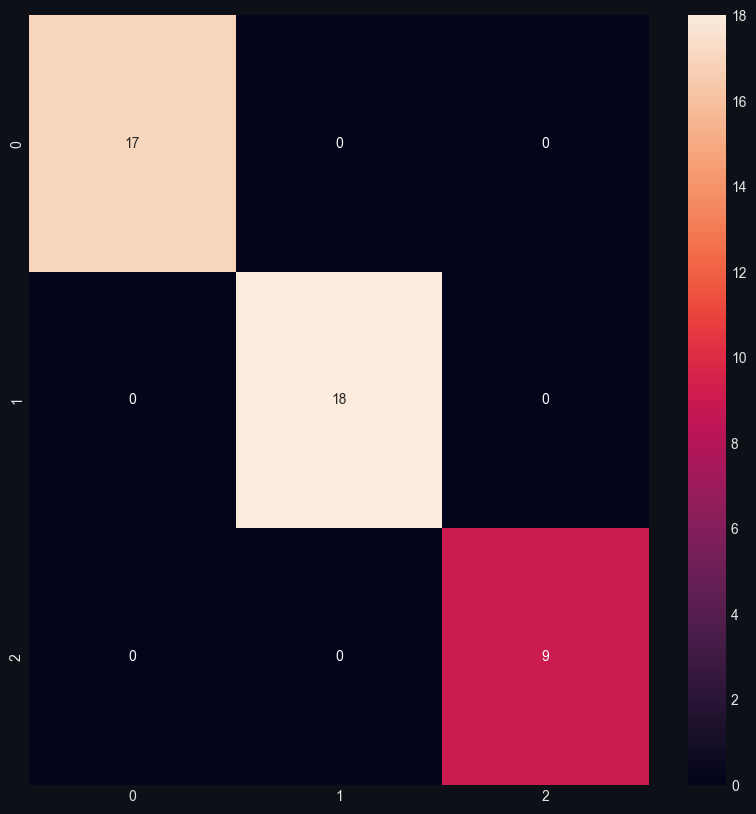

In [19]:
model_name = 'set_dest'
training_root = r'O:\eve_models\training_data\set_dest'

results = build_and_train(root_image_directory=training_root, model_name=model_name)
df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')

In [4]:
results

{'image_resize': [79, 53],
 'class_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\\\set_dest\\set_dest_classes.json',
 'model_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\\\set_dest\\set_dest_model.h5',
 'cm': array([[3, 0, 0],
        [0, 8, 0],
        [0, 0, 4]], dtype=int64)}

6
Found 6 files belonging to 2 classes.
Using 5 files for training.
Found 6 files belonging to 2 classes.
Using 1 files for validation.
['empty', 'set_quant']
Epoch 1/10
5/5 [==============================] - 1s 64ms/step - loss: 1.2884 - accuracy: 0.2000 - val_loss: 0.6514 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5269 - accuracy: 0.8000 - val_loss: 0.6042 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.5843 - accuracy: 0.6000 - val_loss: 0.6589 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.4046 - accuracy: 0.8000 - val_loss: 0.6118 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.4864 - accuracy: 0.8000 - val_loss: 0.4587 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1481 - accuracy: 1.0000 - val_loss: 0.0870 - val_accuracy: 1.0000
Epoch 7

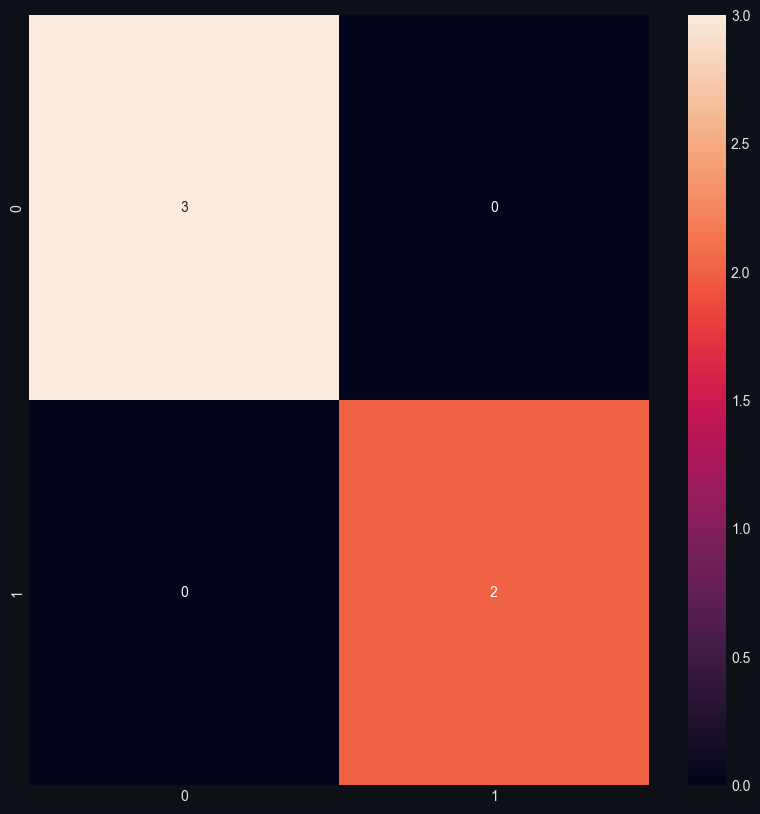

In [21]:
model_name = 'hanger_menus'
training_root = r'O:\eve_models\training_data\hanger_menus'

results = build_and_train(root_image_directory=training_root, model_name=model_name)
df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')

In [10]:
results

{'image_resize': [206, 384],
 'class_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\\\hanger_menus\\hanger_menus_classes.json',
 'model_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\\\hanger_menus\\hanger_menus_model.h5',
 'cm': array([[2, 0],
        [0, 2]], dtype=int64)}

292
Found 292 files belonging to 7 classes.
Using 234 files for training.
Found 292 files belonging to 7 classes.
Using 58 files for validation.
['dock_now', 'invalid', 'jump_though_first', 'jump_through_second', 'no_action', 'warp_to_dock_3', 'warp_to_dock_4']
Epoch 1/10
234/234 [==============================] - 1s 4ms/step - loss: 1.1376 - accuracy: 0.5940 - val_loss: 0.3692 - val_accuracy: 0.9138
Epoch 2/10
234/234 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8889 - val_loss: 0.2041 - val_accuracy: 0.9828
Epoch 3/10
234/234 [==============================] - 1s 3ms/step - loss: 0.1904 - accuracy: 0.9487 - val_loss: 0.1595 - val_accuracy: 0.9828
Epoch 4/10
234/234 [==============================] - 1s 3ms/step - loss: 0.1014 - accuracy: 0.9744 - val_loss: 0.2679 - val_accuracy: 0.9828
Epoch 5/10
234/234 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9872 - val_loss: 0.2393 - val_accuracy: 0.9828
Epoch 6/10
234/234 [========

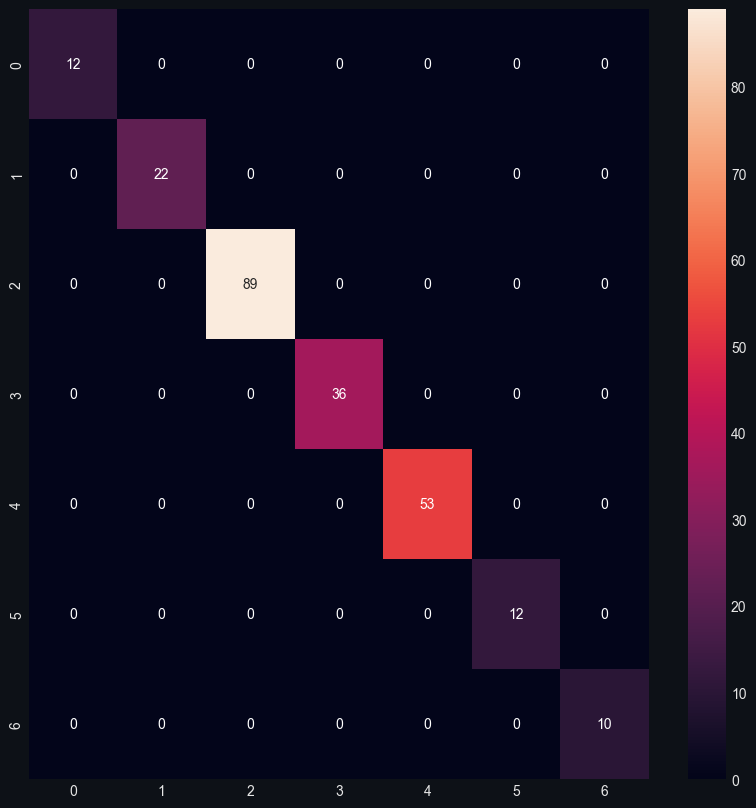

In [18]:
model_name = 'nav_options'
training_root = r'O:\eve_models\training_data\nav_options'

results = build_and_train(root_image_directory=training_root, model_name=model_name)
df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')

In [7]:
results

{'image_resize': [73, 71],
 'class_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\nav_options\\nav_options_classes.json',
 'model_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\nav_options\\nav_options_model.h5',
 'cm': array([[ 6,  0,  0,  0,  0,  0],
        [ 0,  8,  0,  0,  0,  0],
        [ 0,  0, 68,  0,  0,  0],
        [ 0,  0,  0, 20,  0,  0],
        [ 0,  0,  0,  0, 25,  0],
        [ 0,  0,  0,  0,  0,  1]], dtype=int64)}

492
Found 492 files belonging to 5 classes.
Using 394 files for training.
Found 492 files belonging to 5 classes.
Using 98 files for validation.
['both_running', 'invalid', 'miner_1_running', 'miner_2_running', 'no_miners_running']
Epoch 1/10
394/394 [==============================] - 2s 3ms/step - loss: 1.3679 - accuracy: 0.5178 - val_loss: 1.2170 - val_accuracy: 0.5000
Epoch 2/10
394/394 [==============================] - 1s 3ms/step - loss: 0.6623 - accuracy: 0.7563 - val_loss: 0.2329 - val_accuracy: 0.8980
Epoch 3/10
394/394 [==============================] - 1s 3ms/step - loss: 0.1960 - accuracy: 0.9315 - val_loss: 0.0459 - val_accuracy: 0.9898
Epoch 4/10
394/394 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9746 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 5/10
394/394 [==============================] - 1s 3ms/step - loss: 0.0685 - accuracy: 0.9898 - val_loss: 4.8514e-04 - val_accuracy: 1.0000
Epoch 6/10
394/394 [==============================] - 

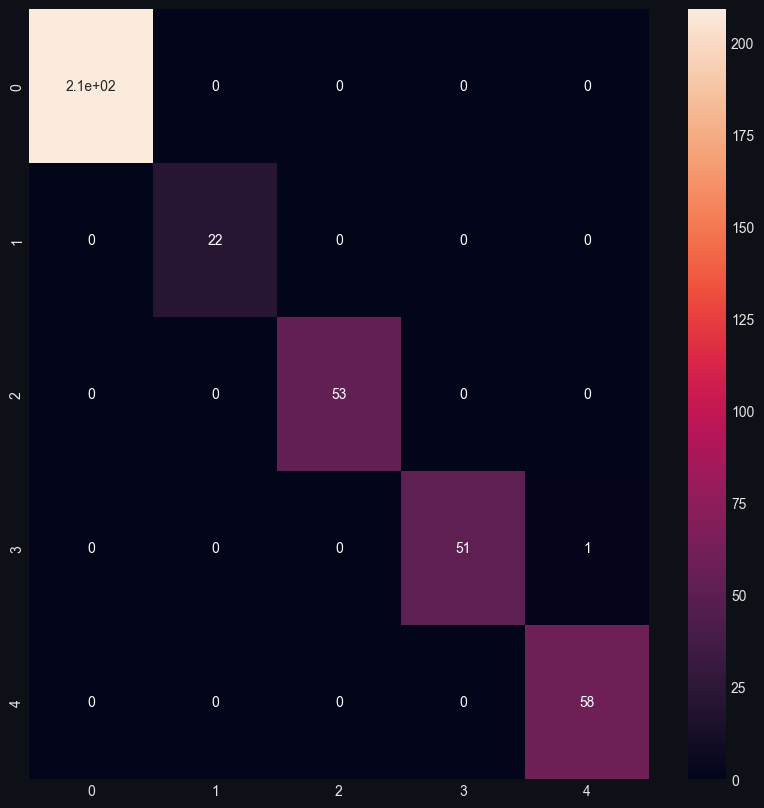

In [17]:
model_name = 'mining_tool_state'
training_root = r'O:\eve_models\training_data\mining_tool_state'

results = build_and_train(root_image_directory=training_root, model_name=model_name)
df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')

In [23]:
results

{'image_resize': [116, 26],
 'class_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\mining_tool_state\\mining_tool_state_classes.json',
 'model_location': 'O:\\source\\repos\\EVE-Online-Bot\\training_data\\mining_tool_state\\mining_tool_state_model.h5',
 'cm': array([[209,   0,   0,   0,   0],
        [  0,  22,   0,   0,   0],
        [  0,   0,  53,   0,   0],
        [  0,   0,   0,  52,   0],
        [  0,   0,   0,   0,  58]], dtype=int64)}

86
Found 87 files belonging to 4 classes.
Using 70 files for training.
Found 87 files belonging to 4 classes.
Using 17 files for validation.
['char_select', 'connection_lost', 'in_flight', 'in_hanger']
Epoch 1/10
70/70 [==============================] - 1s 10ms/step - loss: 1.1711 - accuracy: 0.7286 - val_loss: 0.4412 - val_accuracy: 0.8235
Epoch 2/10
70/70 [==============================] - 0s 4ms/step - loss: 0.3859 - accuracy: 0.9000 - val_loss: 0.0294 - val_accuracy: 1.0000
Epoch 3/10
70/70 [==============================] - 0s 4ms/step - loss: 0.0691 - accuracy: 0.9714 - val_loss: 9.8340e-04 - val_accuracy: 1.0000
Epoch 4/10
70/70 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 6.1267e-04 - val_accuracy: 1.0000
Epoch 5/10
70/70 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 7.3290e-05 - val_accuracy: 1.0000
Epoch 6/10
70/70 [==============================] - 0s 4ms/step - loss: 9.6160e-04 - 

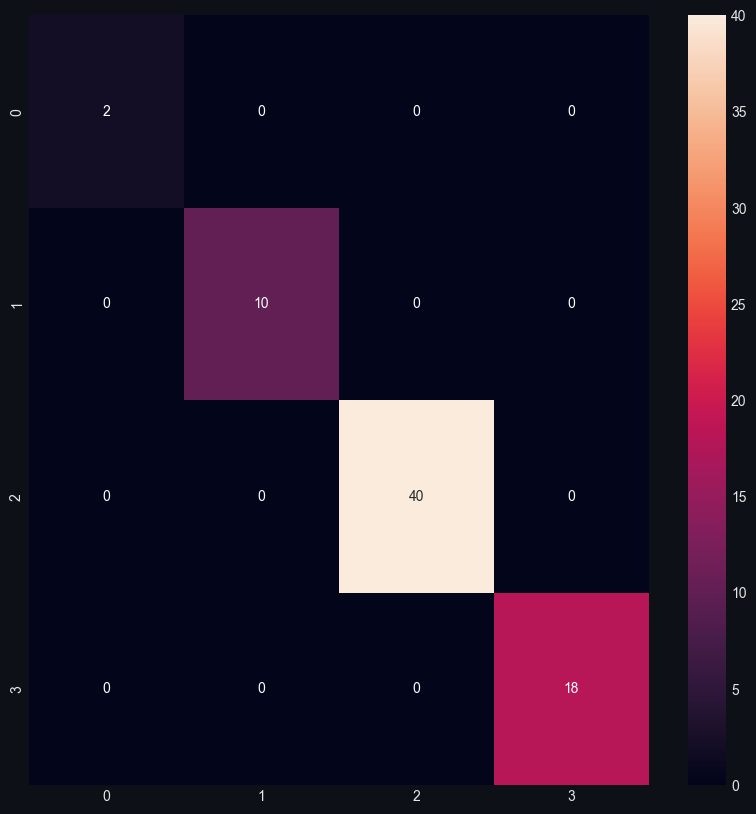

In [16]:
model_name = 'game_state'
training_root = r'O:\eve_models\training_data\game_state'

results = build_and_train(root_image_directory=training_root, model_name=model_name)
df_cm = pd.DataFrame(results['cm'])
plt.figure(figsize = (10,10))
print(results)
sns.heatmap(df_cm, annot=True)

save_to_gcp(source_file=results['model_location'], dest_file=f'{model_name}/{model_name}_model.h5')
save_to_gcp(source_file=results['class_location'], dest_file=f'{model_name}/{model_name}_classes.json')